# Topological Sort

In a nutshell Toposort is an algorithm to sort the nodes in a graph such that if a node $u$ has an edge pointing to node $v$ than $u$ will come before $v$ in the ordering.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks

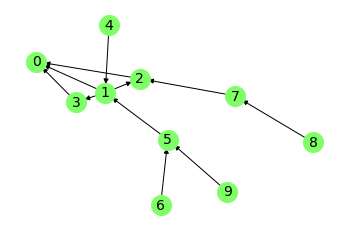

In [2]:
G = nx.gn_graph(10)
G.add_edges_from([(1, 2), (1, 3)])

draw_graph(G)

The algorithm for topo-sort is very easy to understand/implement. Here's the pseudocode:

```
function toposort(G):
    while there are nodes in G:
        Pick a random node in G with in-degree == 0
        if no nodes found:
            STOP --> the graph can't be topologically sorted
        else:
            remove the chosen node and all of 
                it's outgoing edges from the graph
                and append the node to the output.
```

When we remove the node along with all its outgoing edges, the in-degrees of the nodes adjacent to the outging edges decrease by 1.

__Notice that in order for toposort to work there can be no cycles in the graph, otherwise we would have a circular dependency and none of the nodes in the cycle will ever reach in-degree == 0.__

Any edge pointing in both directions (ie node $u$ points to node $v$ and vice versa) creates a cycle between the two nodes it's connected to.

In [3]:
# else block is only executed if for loop
# finished normally, i.e. no breaks encountered
def toposort(G):
    G = G.copy()
    nodes_sort = []
    while G.nodes:
        for node in G:
            if G.in_degree(node) == 0:
                nodes_sort.append(node)
                G.remove_node(node)
                break
        else:
            print('There is no topological sort for this graph.')
            raise ValueError('Graph contains a cycle.', G)

    return nodes_sort

## Results

In [4]:
try:
    output = toposort(G)
except ValueError as e:
    print(e.args[0])
    draw_graph(e.args[1])
else:
    for node in output[:-1]:
        print(f'{node} --> ', end='')
    print(output[-1])

4 --> 6 --> 8 --> 7 --> 9 --> 5 --> 1 --> 2 --> 3 --> 0


# Other implementations

__Other implementations of toposort use a stack or a queue to maintain a list of nodes with in-degree=0.__ In our case above, this wasn't necessary since we could just iterate over each node and check if its in-degree was 0. After deleting the node from the graph, all the in-degrees of its neighbors automatically decreased by 1 thanks to `networkx`. For this reason the algorithm above is very clean, but it comes at a tradeoff; we have to make a copy of our graph everytime we want to run toposort.

The idea behind each algorithm is that in each iteration we pop/dequeue a node which then gets saved to the output. __Remember:__ all nodes in the stack/queue already have an in-degree=0.

These versions of the algorithm terminate when the stack/queue is empty. We know there is no possible toposort if the algorithm terminates and not all the nodes in our graph are in the output list.

We'll implement each version of the algorithm using both stacks and queues for completeness.

##  Using a Queue

To implement our queue, we'll use a python `deque` (pronounced deck) which stands for *double ended queue*. A `deque` behaves almost exactly like a regular python list except that we can append to and pop from both sides using `append`, `appendleft`, `pop`, and `popleft`.

To enqueue an element, just `append` it to the deque (like in a list) and to dequeue an element just pop the first element using `popleft`.

In [5]:
from collections import deque

def topo_queue(G):
    output = []
    degrees = {node: 0 for node in G.nodes}
    
    # calc in-degrees of each node
    for node, neighbors in G.adj.items():
        for neighbor in neighbors:
            degrees[neighbor] += 1
            
    # enqueue all nodes with in-degree=0
    queue = deque(node for node, deg in degrees.items() if deg == 0)
    
    # while the queue isn't empty
    while queue:
        node = queue.popleft()          # dequeue a node 
        for neighbor in G.adj[node]:         # decrease all its neighbors' degrees by 1
            degrees[neighbor] -= 1
            if degrees[neighbor] == 0:       # check if the neighbor's degree is now 0 
                queue.append(neighbor)  # if so add it to the queue

        output.append(node)
    
    # finally check if there are less nodes in the output then in the graph
    if len(set(G.nodes) - set(output)) > 0:  
        raise ValueError('The graph contains a cycle.')
    else:
        return output
            

### Results

In [6]:
try:
    output = topo_queue(G)
except ValueError as e:
    print(f'There is no topological sort for this graph.\n{e}')
else:
    for node in output[:-1]:
        print(f'{node} --> ', end='')
    print(output[-1])

4 --> 6 --> 8 --> 9 --> 7 --> 5 --> 1 --> 2 --> 3 --> 0


##  Using a Stack

The algorithm with a stack is the same as the one with a queue. We just replace our queue with a stack. Instead of enqueuing and dequeuing nodes, we are just pushing and popping them instead. __The only real difference between using a stack vs a queue is the order of the vertices in the output.__

In order to implement our stack, we can use a normal python list. To push an element onto the stack just `append` it to the end of the list. To pop an element from the stack just `pop` it from the end of the list. 

In [7]:
def topo_stack(G):
    output = []
    degrees = {node: 0 for node in G.nodes}
    
    # calc in-degrees of each node
    for node, neighbors in G.adj.items():
        for neighbor in neighbors:
            degrees[neighbor] += 1
            
    # push all nodes with in-degree=0
    stack = [node for node, deg in degrees.items() if deg == 0]
    
    # while the stack isn't empty
    while stack:
        node = stack.pop()              # pop a node from the stack
        for neighbor in G.adj[node]:    # decrease all its neighbors' degrees by 1
            degrees[neighbor] -= 1
            if degrees[neighbor] == 0:  # if a neighbor's degree is now 0 
                stack.append(neighbor)  #                push it on top of the stack

        output.append(node)
    
    # finally check if there are less nodes in the output then in the graph
    if len(set(G.nodes) - set(output)) > 0:  
        raise ValueError('The graph contains a cycle.')
    else:
        return output

### Results

In [8]:
try:
    output = topo_stack(G)
except ValueError as e:
    print(f'There is no topological sort for this graph.\n{e}')
else:
    for node in output[:-1]:
        print(f'{node} --> ', end='')
    print(output[-1])

9 --> 8 --> 7 --> 6 --> 5 --> 4 --> 1 --> 3 --> 2 --> 0
